### Computational Methods (16:540:540) ###

#### Spring 2021 Homework 5 – Python Coding ####


1. Generate 100 random samples from univariate normal and exponential distributions. Then, calculate the means and the standard deviation.
2. Generate 100 random samples from multivariate normal distribution. Then, calculate means and covariance matrix.
3. Perform Multiple Linear Regression using the same dataset generated in the
class as follows: predict 𝑦
a) Using only 𝑥1 ,
b) Using variables 𝑥1 , ... , 𝑥3
c) Using all variables 𝑥1 , ... , 𝑥𝑝
d) Compare the performance for both training and test data using MSE and R-squared.

In [27]:
import numpy as np
import pandas as pd

from numpy.random import default_rng
rng = default_rng(5)

In [28]:
# 1. Generate 100 random samples from univariate normal and exponential distributions. Then, calculate the means and the standard deviation.

In [29]:
mu, sigma = 5,1
n = 100
x1 = rng.normal(mu,sigma,n)
x1_mean = np.mean(x1)
x1_var = np.var(x1)

print(f'From univariate normal distribution,the mean of 100 random the samples is {x1_mean},the variance is {x1_var}')

From univariate normal distribution,the mean of 100 random the samples is 4.775992733090337,the variance is 0.7791377243518098


In [30]:
y1 =rng.exponential(size=n)
y1_mean = np.mean(y1)
y1_var = np.var(y1)

print(f'From exponential distribution,the mean of 100 random the samples is {y1_mean},the variance is {y1_var}')

From exponential distribution,the mean of 100 random the samples is 0.9659351362133682,the variance is 0.7781621514620671


In [31]:
# 2. Generate 100 random samples from multivariate normal distribution. Then, calculate means and covariance matrix.

In [32]:
# P=6, N=100
mu = np.random.uniform(-10,10,size=6)
C = np.random.random((6,6))
cov = C @ C.T # positive semi-definite
x2 = rng.multivariate_normal(mu, cov, n)

In [33]:
pd.DataFrame(mu)

,0
0,2.272939
1,-1.033150
2,1.452607
3,8.393968
4,9.355586
5,8.172576


In [34]:
pd.DataFrame(cov)

,0,1,2,3,4,5
0,2.480782,1.609926,2.082241,2.374403,2.038036,1.836675
1,1.609926,1.196142,1.353228,1.663294,1.314745,1.335691
2,2.082241,1.353228,1.936956,2.341047,2.081499,1.713193
3,2.374403,1.663294,2.341047,3.239747,2.835629,2.250554
4,2.038036,1.314745,2.081499,2.835629,2.707498,1.900864
5,1.836675,1.335691,1.713193,2.250554,1.900864,1.888945


In [35]:
x2_mean = np.mean(x2)
x2_var = np.var(x2)

print(f'From univariate normal distribution,the mean of 100 random the samples is {x2_mean},the variance is {x2_var}')

From univariate normal distribution,the mean of 100 random the samples is 4.727550365895933,the variance is 19.251999302094287


In [36]:
# 3. Perform Multiple Linear Regression using the same dataset generated in the
# class as follows: 
# predict 𝑦
# a) Using only 𝑥1 ,
# b) Using variables 𝑥1 , ... , 𝑥3
# c) Using all variables 𝑥1 , ... , 𝑥𝑝
#  d) Compare the performance for both training and test data using MSE and R-squared.

The output

𝑦=9+3∗𝑥2 +2∗𝑥5+𝜀 

𝜀~𝑁(0,1)

In [42]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score
regr = linear_model.LinearRegression()
import matplotlib.pyplot as plt
from scipy.stats import *
from sklearn.model_selection import train_test_split
x = x2

In [43]:
# a) Using only 𝑥1 

In [44]:
rng = default_rng(5)
y = 9+3*x[:,1]+2*x[:,4] + rng.normal(0,1,n) 

In [45]:
# y

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=123)

In [49]:
X1_train = x_train[:, 0:1]
X1_test = x_test[:, 0:1]

regr1 = linear_model.LinearRegression()
regr1.fit(X1_train, y_train)

pred1_train = regr1.predict(X1_train) 
pred1_test = regr1.predict(X1_test) 

In [15]:
#  MuLtipLe Linear Regression
import numpy as np
from numpy.random import default_rng
from sklearn import linear_model
rng=default_rng(5)

In [16]:
# generate mean from uniform
p=6
mu = rng.uniform(low=0.0, high=10, size=p)
A=rng.uniform(low=0.5, high=2.5, size=(p, p))
sigma=np. dot(A, A.transpose())
# sigma

In [17]:
n =100
x = rng.multivariate_normal(mu, sigma, (n))
# x

In [18]:
#y=9+3*x2 + 2 *x5 + rng.normal(0,1,n)
y = 9 +3*x[:,1]+2*x[:,4]+rng.normal(0,1,n)

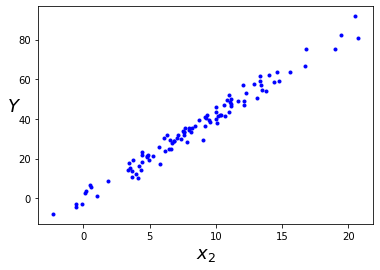

In [19]:
import matplotlib. pyplot as plt
# Plot the data
plt.plot(x[:,1],y,"b.")
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$Y$", rotation = 0, fontsize=18)
plt.axis()
plt. show()

In [20]:
# using x1 and x6
X_b =np.c_[np.ones((n,1)),x[:,0],x[:,5]]
theta_best= np.dot(np.dot(np.linalg.inv(np.dot(X_b.T,X_b)),X_b.T),y)
theta_best

array([17.41764316, -0.15689429,  4.76151212])

In [21]:
from numpy.random import default_rng
rng = default_rng(5)
n_new=10
x_new = rng.multivariate_normal(mu, sigma, (n_new))
y_new = 9 + 3* x_new[:,1]+2*x_new[:,4]+ rng.normal(0,1,n_new)
x_b_new = np.c_[np.ones((x_new.shape[0],1)),x_new[:,0],x_new[:,5]]
y_pred = np.dot(x_b_new, theta_best)
y_pred

array([45.62239589, 44.31692625, 47.7201165 , 48.45059231, 35.24717666,
       58.65565225, 44.37864522, 72.69099697, 28.4887216 , 30.86922178])

In [22]:
# using x1 and x6
# Accuracy
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_new, y_pred))
# The coefficient of determination: l is perfect prediction
print('Coefficient of determination:%.2f'% r2_score(y_new, y_pred))

Mean squared error: 67.06
Coefficient of determination:0.57


In [23]:
# using x1
X_b =np.c_[np.ones((n,1)),x[:,0]]
theta_best= np.dot(np.dot(np.linalg.inv(np.dot(X_b.T,X_b)),X_b.T),y)
theta_best

array([-2.8172434 ,  4.57364512])

In [24]:
from numpy.random import default_rng
rng = default_rng(5)
n_new=10
x_new = rng.multivariate_normal(mu, sigma, (n_new))
y_new = 9 + 3* x_new[:,1]+2*x_new[:,4]+ rng.normal(0,1,n_new)
x_b_new = np.c_[np.ones((x_new.shape[0],1)),x_new[:,0],x_new[:,5]]
y_pred = np.dot(x_b_new, theta_best)
y_pred

ValueError: shapes (10,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

In [65]:
# using x2 and x5
X_b =np.c_[np.ones((n,1)),x[:,1],x[:,4]]
theta_best= np.dot(np.dot(np.linalg.inv(np.dot(X_b.T,X_b)),X_b.T),y)
theta_best

array([9.1436399 , 2.98410747, 2.02728756])

In [66]:
x_b_new=np.c_[np.ones((x_new.shape[0],1)),x_new[:,1],x_new[:,4]]
y_pred =np.dot(x_b_new,theta_best)
y_pred

array([55.74867714, 44.92485455, 48.64874587, 50.03064092, 27.88742181,
       58.70214369, 60.99213335, 76.18753939, 38.90578227, 40.88294498])

In [67]:
# using x2 and x5
# Accuracy
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_new, y_pred))
# The coefficient of determination: l is perfect prediction
print('Coefficient of determination:%.2f'% r2_score(y_new, y_pred))

Mean squared error: 0.43
Coefficient of determination:1.00
